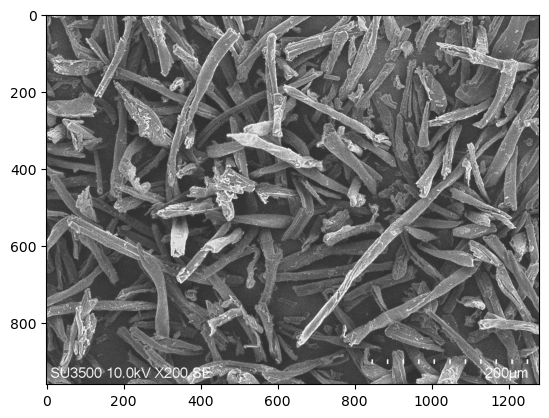

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io, color
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

#LOADING AND READING IMAGE
im = io.imread("sem.jpg.jpg")
plt.imshow(im, cmap ='gray')

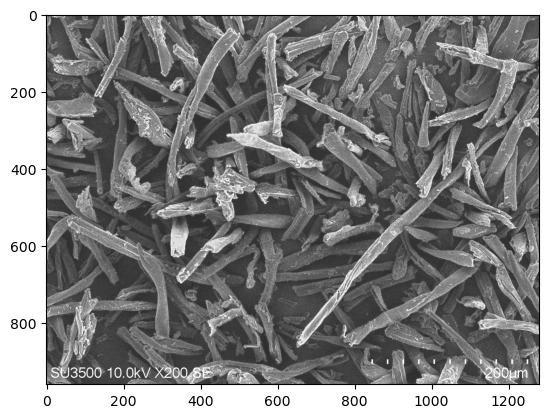

In [2]:
#Converting to grayscale
from skimage.color import rgb2gray
im1 = rgb2gray(im)
plt.imshow(im1, cmap='gray')

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


<function matplotlib.pyplot.show(close=None, block=None)>

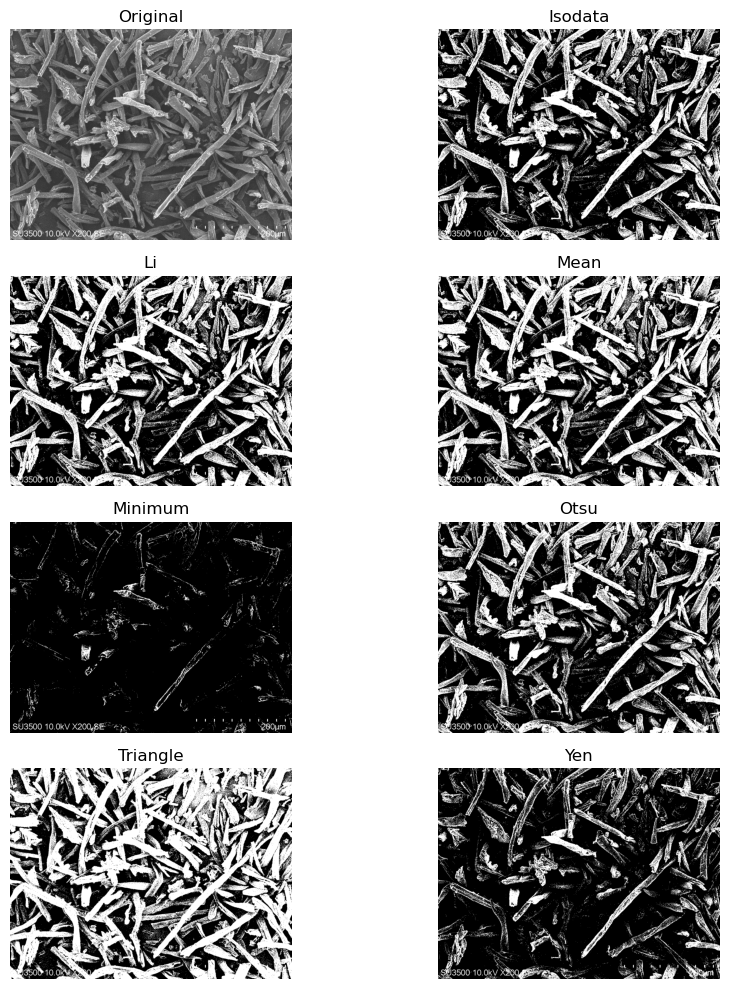

In [3]:
#Thresholding: to get the binary image
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(im1, figsize=(10, 10), verbose=True)
plt.show

In [4]:
from skimage.filters import threshold_mean
th = threshold_mean(im1)
print(th)

0.4088848134957109


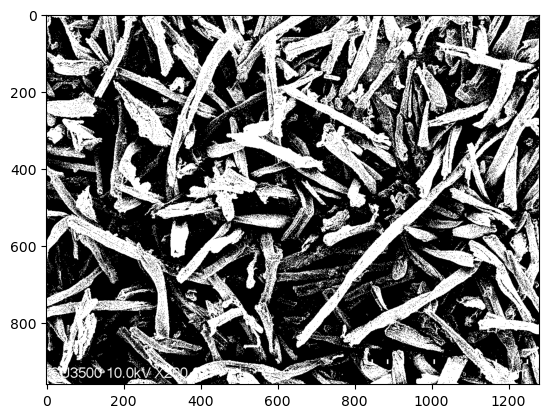

In [5]:
th_im = im1 > th
plt.imshow(th_im, cmap='gray')
     

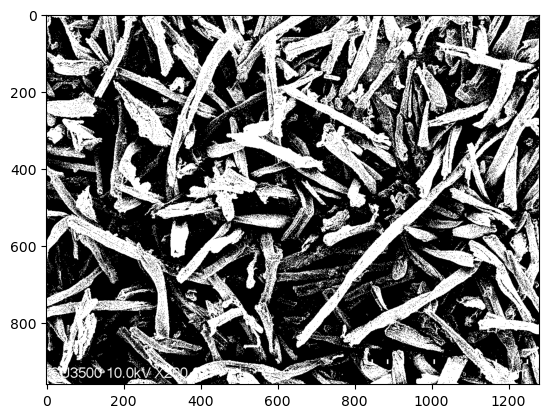

In [6]:
#PARTICLE MEASUREMNET

from skimage.segmentation import clear_border
im2= th_im
plt.imshow(im2, cmap='gray')

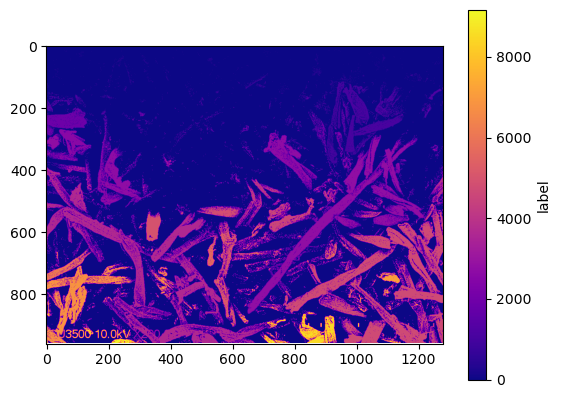

In [7]:
from skimage.measure import label
im_l = label(im2, connectivity=im2.ndim)
#cmap=plt.cm.get_cmap('plasma')
i_map =plt.imshow(im_l, cmap='plasma')
i_map_labeled=plt.colorbar(i_map).set_label('label')

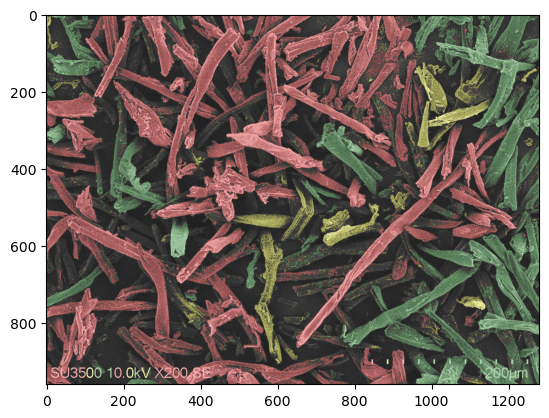

In [8]:
from skimage.color import label2rgb
# colors option is a list of 3 elements
im_ov_s = label2rgb(im_l, image=im1, colors= ['yellow','green', 'red'])
plt.imshow(im_ov_s)

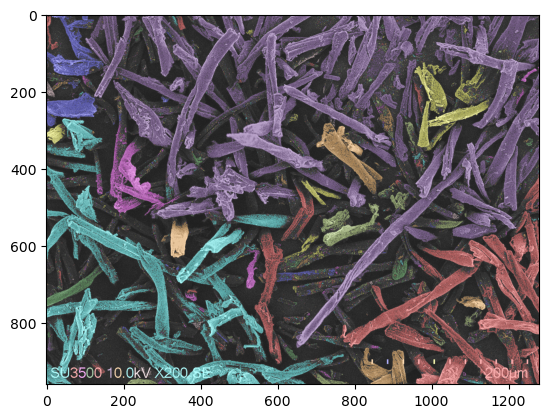

In [9]:
from skimage.color import label2rgb
import matplotlib as mpl
im_ov_s1 = label2rgb(im_l, image=im1)
plt.imsave("im_ov_s.jpg", im_ov_s1) 
plt.imshow(im_ov_s1)

In [32]:
from skimage.measure import regionprops, regionprops_table
scale = 0.005 #micron/pixel
props=regionprops(im_l, im1)
#for prop in all_props:
#print('Label: {} Area: {}'.format(prop.label, prop.area))


props_t = regionprops_table(im_l, im1, 
                          properties=['label','area', 'equivalent_diameter',
                                       'solidity'])

import pandas as pd
df = pd.DataFrame(props_t)
print(df)

      label  area  equivalent_diameter  solidity
0         1   748            30.860706  0.369565
1         2  7916           100.394045  0.397170
2         3     4             2.256758  0.800000
3         4     1             1.128379  1.000000
4         5     2             1.595769  1.000000
...     ...   ...                  ...       ...
9159   9160     1             1.128379  1.000000
9160   9161     1             1.128379  1.000000
9161   9162     1             1.128379  1.000000
9162   9163     2             1.595769  1.000000
9163   9164     1             1.128379  1.000000

[9164 rows x 4 columns]


In [33]:
df['area_sqmicron'] = df['area'] * (scale**2)
df['equivalent_diameter_micron'] = df['equivalent_diameter'] * (scale)
df

label  area  equivalent_diameter  solidity  area_sqmicron  \
0         1   748            30.860706  0.369565       0.018700   
1         2  7916           100.394045  0.397170       0.197900   
2         3     4             2.256758  0.800000       0.000100   
3         4     1             1.128379  1.000000       0.000025   
4         5     2             1.595769  1.000000       0.000050   
...     ...   ...                  ...       ...            ...   
9159   9160     1             1.128379  1.000000       0.000025   
9160   9161     1             1.128379  1.000000       0.000025   
9161   9162     1             1.128379  1.000000       0.000025   
9162   9163     2             1.595769  1.000000       0.000050   
9163   9164     1             1.128379  1.000000       0.000025   

      equivalent_diameter_micron  
0                       0.154304  
1                       0.501970  
2                       0.011284  
3                       0.005642  
4                       0.007979  
...                          ...  
9159                    0.005642  
9160                    0.005642  
9161                    0.005642  
9162                    0.007979  
9163                    0.005642  

[9164 rows x 6 columns]

In [34]:
df = df[df['area'] > 100]

In [35]:
#Equivalent diameter = SqRoot{(4*Area)/pi}

df

label    area  equivalent_diameter  solidity  area_sqmicron  \
0         1     748            30.860706  0.369565       0.018700   
1         2    7916           100.394045  0.397170       0.197900   
5         6  157419           447.696433  0.397606       3.935475   
7         8     127            12.716187  0.538136       0.003175   
10       11     393            22.369245  0.706835       0.009825   
...     ...     ...                  ...       ...            ...   
8937   8938     190            15.553633  0.454545       0.004750   
8938   8939     160            14.272993  0.432432       0.004000   
8999   9000     632            28.367012  0.560781       0.015800   
9049   9050     708            30.024217  0.819444       0.017700   
9087   9088     164            14.450304  0.559727       0.004100   

      equivalent_diameter_micron  
0                       0.154304  
1                       0.501970  
5                       2.238482  
7                       0.063581  
10                      0.111846  
...                          ...  
8937                    0.077768  
8938                    0.071365  
8999                    0.141835  
9049                    0.150121  
9087                    0.072252  

[92 rows x 6 columns]

In [36]:
df_final = df.reindex(columns =['label', 'area_sqmicron', 'equivalent_diameter_micron', 'solidity'])
df_final

label  area_sqmicron  equivalent_diameter_micron  solidity
0         1       0.018700                    0.154304  0.369565
1         2       0.197900                    0.501970  0.397170
5         6       3.935475                    2.238482  0.397606
7         8       0.003175                    0.063581  0.538136
10       11       0.009825                    0.111846  0.706835
...     ...            ...                         ...       ...
8937   8938       0.004750                    0.077768  0.454545
8938   8939       0.004000                    0.071365  0.432432
8999   9000       0.015800                    0.141835  0.560781
9049   9050       0.017700                    0.150121  0.819444
9087   9088       0.004100                    0.072252  0.559727

[92 rows x 4 columns]

In [37]:
df_final.to_csv('measure_simulated.csv')

In [38]:
import plotly.express as px
fig = px.scatter(df_final, x="label", y="equivalent_diameter_micron", color="label")
                
fig.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='equivalent_diameter_micron', ylabel='Density'>

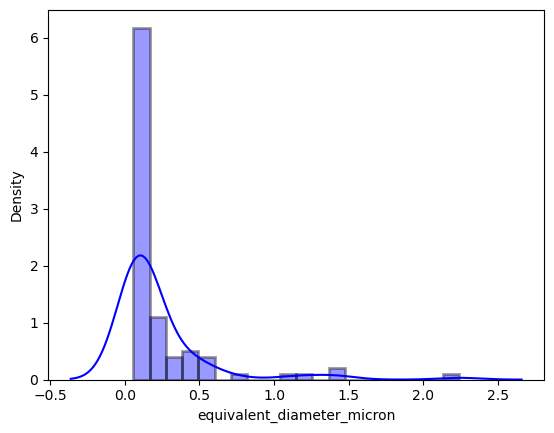

In [39]:
#Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.
#Density: normalize such that the total area of the histogram equals 1

import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(df_final['equivalent_diameter_micron'], color='b', bins = 20, kde = True, norm_hist=True, hist_kws = dict(edgecolor = 'k', linewidth = 2))

<AxesSubplot:xlabel='equivalent_diameter_micron', ylabel='Count'>

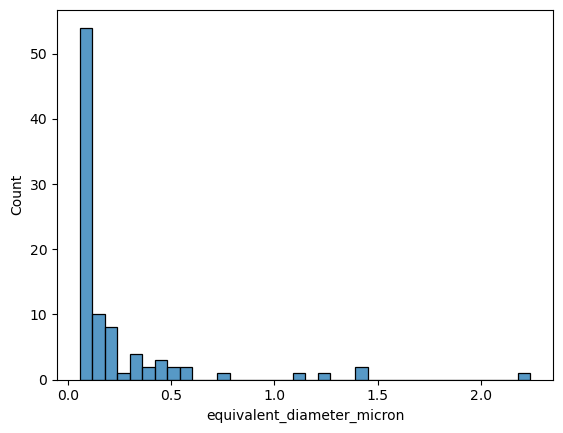

In [40]:
sns.histplot(data=df_final['equivalent_diameter_micron'] )